## Prediksi Penyakit Talasemia Alfa Menggunakan Metode K-Nearest Neighbors (KNN)

Anggota Kelompok 9:
1. Muhammad Basil Musyaffa Amin 		(215150201111023)
2. Muhammad Fajrul Alwan				(215150207111023)
3. Gibran Hakim 						(215150200111020)
4. Muhammad Jilan Naufal				(215150207111018)


In [ ]:
! wget https://raw.githubusercontent.com/awLann/dataset/main/alphanorm.csv

--2023-06-08 15:27:20--  https://raw.githubusercontent.com/awLann/dataset/main/alphanorm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19537 (19K) [text/plain]
Saving to: ‘alphanorm.csv.13’

alphanorm.csv.13    100%[===================>]  19.08K  --.-KB/s    in 0s      

2023-06-08 15:27:20 (53.4 MB/s) - ‘alphanorm.csv.13’ saved [19537/19537]



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('alphanorm.csv')
df

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.000000,33.000000,309.0,88.500000,2.600000,0.110000,alpha carrier
1,male,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.400000,43.100000,687.0,87.800000,2.400000,0.900000,alpha carrier
2,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.000000,33.000000,309.0,88.500000,2.600000,0.100000,alpha carrier
3,male,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.000000,50.000000,334.0,86.800000,2.800000,0.300000,alpha carrier
4,male,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.000000,30.000000,596.0,86.300000,2.400000,1.300000,alpha carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,male,15.5,45.9,5.19,88.4,29.9,33.8,12.6,8.8,47.565000,40.975000,177.0,88.600000,3.200000,0.400000,normal
199,female,10.4,33.3,4.93,67.6,21.1,31.2,14.8,8.9,44.478378,45.527027,295.0,88.000000,2.400000,0.500000,normal
200,male,9.8,29.8,4.75,62.7,19.0,30.4,14.7,7.2,48.234483,41.537931,262.0,85.100000,2.400000,1.100000,normal
201,male,11.2,37.2,5.43,68.5,20.6,30.1,15.1,12.0,13.500000,76.800000,277.0,86.523291,2.588608,0.769231,normal


## PREPROCESSING DATA


1. Mengecek Missing Value

In [ ]:
nan_data = df[df.isna().any(axis=1)]
nan_data

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
86,female,10.2,35.876404,5.061346,72.546923,NaN,32.239423,14.827660,7.99,47.000000,47.000000,351.0,88.800000,2.500000,1.300000,alpha carrier
132,female,12.0,35.600000,NaN,69.300000,35.6,33.700000,13.400000,11.07,41.600000,25.100000,153.0,87.331429,2.474286,0.560909,alpha carrier
147,female,11.6,33.120000,5.600000,66.800000,NaN,31.631707,16.642432,7.42,48.234483,41.537931,251.0,87.331429,2.474286,0.560909,alpha carrier


In [ ]:
df = df.dropna()
df

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.000000,33.000000,309.0,88.500000,2.600000,0.110000,alpha carrier
1,male,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.400000,43.100000,687.0,87.800000,2.400000,0.900000,alpha carrier
2,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.000000,33.000000,309.0,88.500000,2.600000,0.100000,alpha carrier
3,male,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.000000,50.000000,334.0,86.800000,2.800000,0.300000,alpha carrier
4,male,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.000000,30.000000,596.0,86.300000,2.400000,1.300000,alpha carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,male,15.5,45.9,5.19,88.4,29.9,33.8,12.6,8.8,47.565000,40.975000,177.0,88.600000,3.200000,0.400000,normal
199,female,10.4,33.3,4.93,67.6,21.1,31.2,14.8,8.9,44.478378,45.527027,295.0,88.000000,2.400000,0.500000,normal
200,male,9.8,29.8,4.75,62.7,19.0,30.4,14.7,7.2,48.234483,41.537931,262.0,85.100000,2.400000,1.100000,normal
201,male,11.2,37.2,5.43,68.5,20.6,30.1,15.1,12.0,13.500000,76.800000,277.0,86.523291,2.588608,0.769231,normal


2. Visualisasi Data menggunakan Seaborn

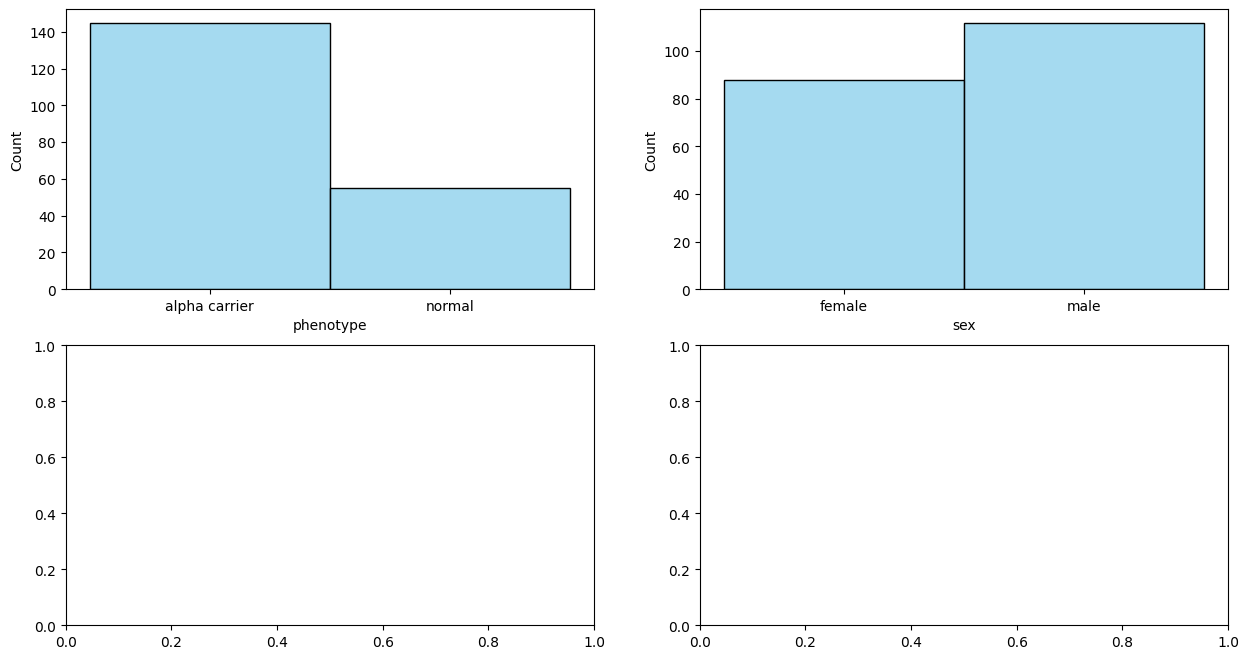

In [ ]:
fig,axes = plt.subplots(2,2, figsize=(15,8))

sns.histplot(data=df,x='phenotype',ax=axes[0,0],color='skyblue')
sns.histplot(data=df,x='sex',ax=axes[0,1],color='skyblue')
plt.show()

3. Transformasi Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [ ]:
df['sex'] = encode.fit_transform(df['sex'].values)
df['phenotype'] = encode.fit_transform(df['phenotype'].values)
df

<ipython-input-8-779755ccf8bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = encode.fit_transform(df['sex'].values)
<ipython-input-8-779755ccf8bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phenotype'] = encode.fit_transform(df['phenotype'].values)


,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,0,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.000000,33.000000,309.0,88.500000,2.600000,0.110000,0
1,1,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.400000,43.100000,687.0,87.800000,2.400000,0.900000,0
2,0,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.000000,33.000000,309.0,88.500000,2.600000,0.100000,0
3,1,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.000000,50.000000,334.0,86.800000,2.800000,0.300000,0
4,1,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.000000,30.000000,596.0,86.300000,2.400000,1.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1,15.5,45.9,5.19,88.4,29.9,33.8,12.6,8.8,47.565000,40.975000,177.0,88.600000,3.200000,0.400000,1
199,0,10.4,33.3,4.93,67.6,21.1,31.2,14.8,8.9,44.478378,45.527027,295.0,88.000000,2.400000,0.500000,1
200,1,9.8,29.8,4.75,62.7,19.0,30.4,14.7,7.2,48.234483,41.537931,262.0,85.100000,2.400000,1.100000,1
201,1,11.2,37.2,5.43,68.5,20.6,30.1,15.1,12.0,13.500000,76.800000,277.0,86.523291,2.588608,0.769231,1


4. Normalisasi MinMax

In [ ]:
def minmax(df_input):
  list_fitur = df_input.columns[:-1]
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return df_input

In [ ]:
df_scaled = minmax(df)
df_scaled

<ipython-input-9-a0853e29a377>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input[fitur] = (df_input[fitur]-min)/(max-min)


,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,0.0,0.351648,0.451724,0.621560,0.477273,0.480952,0.492386,0.144444,0.403315,0.656381,0.295958,0.207547,0.674342,0.766667,0.018966,0
1,1.0,0.351648,0.155172,0.428899,0.327273,0.676190,1.000000,0.500000,0.441989,0.605891,0.427640,0.582920,0.651316,0.700000,0.155172,0
2,0.0,0.351648,0.451724,0.621560,0.477273,0.480952,0.492386,0.144444,0.403315,0.656381,0.295958,0.207547,0.674342,0.766667,0.017241,0
3,1.0,0.758242,0.737931,0.633028,0.825000,0.804762,0.624365,0.072222,0.530387,0.347826,0.517601,0.232373,0.618421,0.833333,0.051724,0
4,1.0,0.428571,0.424138,0.598624,0.477273,0.561905,0.624365,0.272222,1.000000,0.852735,0.256845,0.492552,0.601974,0.700000,0.224138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1.0,0.868132,0.820690,0.637615,0.925000,0.895238,0.644670,0.100000,0.359116,0.580154,0.399935,0.076465,0.677632,0.966667,0.068966,1
199,0.0,0.307692,0.386207,0.577982,0.452273,0.476190,0.512690,0.222222,0.364641,0.536864,0.459283,0.193644,0.657895,0.700000,0.086207,1
200,1.0,0.241758,0.265517,0.536697,0.340909,0.376190,0.472081,0.216667,0.270718,0.589544,0.407274,0.160874,0.562500,0.700000,0.189655,1
201,1.0,0.395604,0.520690,0.692661,0.472727,0.452381,0.456853,0.238889,0.535912,0.102384,0.867014,0.175770,0.609319,0.762869,0.132626,1


## OVERSAMPLING SMOTE

In [ ]:
  from imblearn.over_sampling import SMOTE

In [ ]:
x = df_scaled.drop(['phenotype'],axis=1)
y = df_scaled['phenotype']

In [ ]:
#sebelum oversampling
print(x.shape)
print(y.shape)

(200, 15)
(200,)


In [ ]:
sm = SMOTE(random_state=30)
#sampling smote
x_sampling,y_sampling = sm.fit_resample(x,y )

In [ ]:
print(x_sampling.shape)
print(y_sampling.shape)

(290, 15)
(290,)


<function matplotlib.pyplot.show(close=None, block=None)>

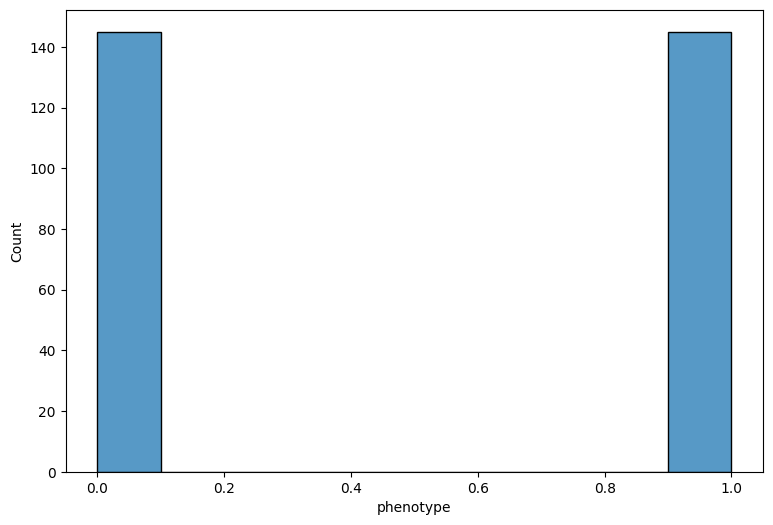

In [ ]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling)
plt.show

## EVALUASI 3 PEMODELAN (KNN, NAIVE BAYES, SVM)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(x_sampling, y_sampling, test_size=0.20, random_state=1, shuffle=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

for name, model in models:
  results = []
  names = []
  kfold = StratifiedKFold(n_splits=15, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.590556 (0.111185)
NB: 0.550833 (0.107175)
SVM: 0.504444 (0.023934)


In [ ]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictionSVC = model.predict(X_validation)

model2 = GaussianNB()
model2.fit(X_train, Y_train)
predictionGaussian = model2.predict(X_validation)

model3 = KNeighborsClassifier()
model3.fit(X_train, Y_train)
predictionKNN = model3.predict(X_validation)

In [ ]:
from sklearn.metrics import classification_report
print("=============================== SVC ==================================")
print(classification_report(Y_validation, predictionSVC))
print("=======================================================================")
print("=============================== Gaussian ==================================")
print(classification_report(Y_validation, predictionGaussian))
print("=======================================================================")
print("=============================== KNN ==================================")
print(classification_report(Y_validation, predictionKNN))
print("=======================================================================")

=============================== SVC ==================================
              precision    recall  f1-score   support

           0       0.44      0.96      0.60        26
           1       0.00      0.00      0.00        32

    accuracy                           0.43        58
   macro avg       0.22      0.48      0.30        58
weighted avg       0.20      0.43      0.27        58

=============================== Gaussian ==================================
              precision    recall  f1-score   support

           0       0.67      0.38      0.49        26
           1       0.63      0.84      0.72        32

    accuracy                           0.64        58
   macro avg       0.65      0.61      0.60        58
weighted avg       0.65      0.64      0.62        58

=============================== KNN ==================================
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        26
           1       

## PERHITUGAN AKURASI MENGGUNAKAN PEMODELAN KNN

In [ ]:
from sklearn.model_selection import train_test_split
data_latih,data_uji = train_test_split(df_scaled,test_size=0.2)

In [ ]:
print(data_latih.shape[0])
print(data_uji.shape[0])

160
40


In [ ]:
label_latih = data_latih.pop('phenotype')
label_uji = data_uji.pop('phenotype')

In [ ]:
import numpy as np
def jarakEu(data1,data2):
  jarak = np.square(data1-data2)
  jarak = np.sum(jarak)
  return np.sqrt(jarak)

In [ ]:
jarak = jarakEu(data_latih.iloc[0],data_uji.iloc[0])
print(jarak)

0.668570937862003


In [ ]:
from collections import Counter
def knn(k,datalatih,labellatih,datauji):
  jarak = np.array([jarakEu(datalatih.iloc[x],datauji) for x in range(datalatih.shape[0])])
  indeks_k_minimum = jarak.argsort()[:k]
  k_kelas = labellatih.iloc[indeks_k_minimum].to_numpy()
  counter = Counter(k_kelas)
  kelas_uji = counter.most_common(1)[0][0]
  return kelas_uji

In [ ]:
def test_hasil(list_klasifikasi, label_uji):
  test = [i for i, j in zip(list_klasifikasi, label_uji) if i == j]
  return len(test)
list_klasifikasi = np.array(label_uji.tolist())

In [ ]:
def knn_multi(k, datalatih, datauji):
  hasil = [knn(k, data_latih, label_latih, data_uji.iloc[i]) for i in range(data_uji.shape[0])]
  return hasil

In [ ]:
k3 = test_hasil(list_klasifikasi, knn_multi(3, data_latih, data_uji)) #nilai k=3
print('Untuk K = 3','hasilnya adalah',k3)
k7 = test_hasil(list_klasifikasi, knn_multi(7, data_latih, data_uji)) #nilai k=7
print('Untuk K = 7','hasilnya adalah',k7)
k9 = test_hasil(list_klasifikasi, knn_multi(9, data_latih, data_uji)) #nilai k=9
print('Untuk K = 9','hasilnya adalah',k9)
k13 = test_hasil(list_klasifikasi, knn_multi(13, data_latih, data_uji)) #nilai k=13
print('Untuk K = 13','hasilnya adalah',k13)

Untuk K = 3 hasilnya adalah 23
Untuk K = 7 hasilnya adalah 30
Untuk K = 9 hasilnya adalah 30
Untuk K = 13 hasilnya adalah 29
